In [233]:
import re
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt  
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes

def data_preprocess1(datafile):
    with open(datafile) as fp:
        text = fp.readlines()
    pattern=r'\D+(\d+)\D+(\d+[.]\d+)\D+(\d+[.]\d+)\D+(\d+[.]\d+)\D+(\d+[.]\d+)\D+(\d+[.]\d+)'
    
    Iters, Time, TrainLoss, TrainAccu, TestLoss, TestAccu= [], [], [], [], [], []
    for line in text:
#         print(line)
        elem = re.search(pattern,line).groups()
#         print(elem)
        
        Iters.append(int(elem[0]))
        Time.append(float(elem[1]))
        TrainLoss.append(float(elem[2]))
        TrainAccu.append(float(elem[3]))
        TestLoss.append(float(elem[4]))
        TestAccu.append(float(elem[5]))
    result = dict()
    result['iter'], result["time"], result['trainloss'], result['trainaccu']= Iters,Time,TrainLoss,TrainAccu
    result['testloss'], result['testaccu']= TestLoss,TestAccu
    df=pd.DataFrame(result)
#     
    return df

def data_preprocess2(datafile):
    with open(datafile) as fp:
        text = fp.readlines()
    pattern=r'\D+(\d+)\D+\d+/\d+\D+\d+%\)\]\D+(\d+[.]\d+)\D+(\d+[.]\d+)\D+(\d+[.]\d+)\D+(\d+[.]\d+)\D+(\d+[.]\d+)'
    
    Iters, Time, TrainLoss, TrainAccu, TestLoss, TestAccu= [], [], [], [], [], []
    for line in text:
#         print(line)
        elem = re.search(pattern,line).groups()
#         print(elem)
        
        Iters.append(int(elem[0]))
        Time.append(float(elem[1]))
        TrainLoss.append(float(elem[2]))
        TrainAccu.append(float(elem[3]))
        TestLoss.append(float(elem[4]))
        TestAccu.append(float(elem[5]))
    result = dict()
    result['epoch'], result["time"], result['trainloss'], result['trainaccu']= Iters,Time,TrainLoss,TrainAccu
    result['testloss'], result['testaccu']= TestLoss,TestAccu
    df=pd.DataFrame(result)
#     
    return df

In [234]:
def plot(df, title, batch_size = None):
    try:
        iters = df["iter"]
    except:
        print(1)
        iters = df.index*(500//batch_size)

    time = df['time']
    trainloss, testloss = df['trainloss'], df['testloss']
    trainerror, testerror = (1-df['trainaccu'])*100, (1-df['testaccu'])*100

    N = 100000

    plt.figure()
    plt.plot(iters[:N], trainloss[:N])
    plt.grid()
    plt.title('Train Loss', fontdict={'fontsize':18,'fontweight':16})
    plt.xlabel('Iters',fontdict={'fontsize':15,'fontweight':14})
    plt.ylabel('Loss',fontdict={'fontsize':15,'fontweight':14})
    plt.ylim((0.2,0.8))
    plt.savefig("plots/{}_iter_trainloss.png".format(title))

    plt.figure()
    plt.plot(iters[:N], trainerror[:N])
    plt.grid()
    plt.title('Train Error', fontdict={'fontsize':18,'fontweight':16})
    plt.xlabel('Iters',fontdict={'fontsize':15,'fontweight':14})
    plt.ylabel('Error',fontdict={'fontsize':15,'fontweight':14})
    plt.ylim((8,30))
    plt.savefig("plots/{}_iter_trainerror.png".format(title))

    plt.figure()
    plt.plot(iters[:N], testloss[:N])
    plt.grid()
    plt.title('Test Loss', fontdict={'fontsize':18,'fontweight':16})
    plt.xlabel('Iters',fontdict={'fontsize':15,'fontweight':14})
    plt.ylabel('Loss',fontdict={'fontsize':15,'fontweight':14})
    plt.ylim((0.4,0.7))
    plt.savefig("plots/{}_iter_testloss.png".format(title))

    plt.figure()
    plt.plot(iters[:N], testerror[:N])
    plt.grid()
    plt.title('Test Error', fontdict={'fontsize':18,'fontweight':16})
    plt.xlabel('Iters',fontdict={'fontsize':15,'fontweight':14})
    plt.ylabel('error',fontdict={'fontsize':15,'fontweight':14})
    plt.ylim((8,30))
    plt.savefig("plots/{}_iter_testerror.png".format(title))

    ### time

    plt.figure()
    plt.plot(time[:N], trainloss[:N])
    plt.grid()
    plt.title('Train Loss', fontdict={'fontsize':18,'fontweight':16})
    plt.xlabel('Time(Sec)',fontdict={'fontsize':15,'fontweight':14})
    plt.ylabel('Loss',fontdict={'fontsize':15,'fontweight':14})
    plt.ylim((0.2,0.8))
    plt.savefig("plots/{}_time_trainloss.png".format(title))

    plt.figure()
    plt.plot(time[:N], trainerror[:N])
    plt.grid()
    plt.title('Train Error', fontdict={'fontsize':18,'fontweight':16})
    plt.xlabel('Time(Sec)',fontdict={'fontsize':15,'fontweight':14})
    plt.ylabel('Error',fontdict={'fontsize':15,'fontweight':14})
    plt.ylim((8,30))
    plt.savefig("plots/{}_time_trainerror.png".format(title))

    plt.figure()
    plt.plot(time[:N], testloss[:N])
    plt.grid()
    plt.title('Test Loss', fontdict={'fontsize':18,'fontweight':16})
    plt.xlabel('Time(Sec)',fontdict={'fontsize':15,'fontweight':14})
    plt.ylabel('Loss',fontdict={'fontsize':15,'fontweight':14})
    plt.ylim((0.4,0.7))
    plt.savefig("plots/{}_time_testloss.png".format(title))

    plt.figure()
    plt.plot(time[:N], testerror[:N])
    plt.grid()
    plt.title('Test Error', fontdict={'fontsize':18,'fontweight':16})
    plt.xlabel('Time(Sec)',fontdict={'fontsize':15,'fontweight':14})
    plt.ylabel('Error',fontdict={'fontsize':15,'fontweight':14})
    plt.ylim((8,30))
    plt.savefig("plots/{}_time_testerror.png".format(title))

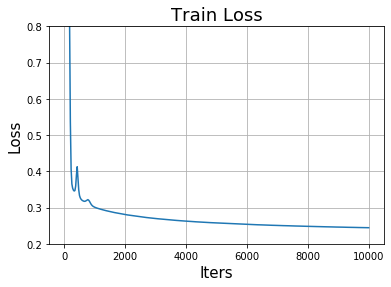

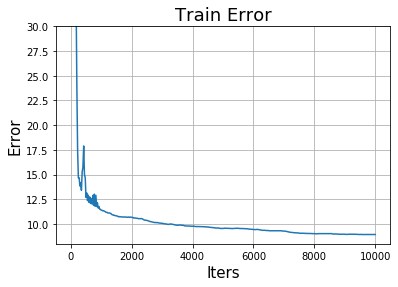

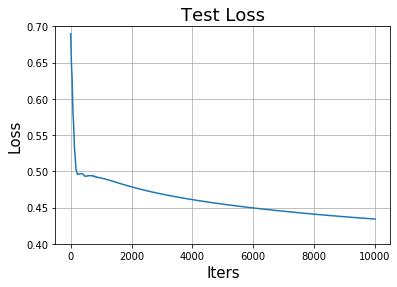

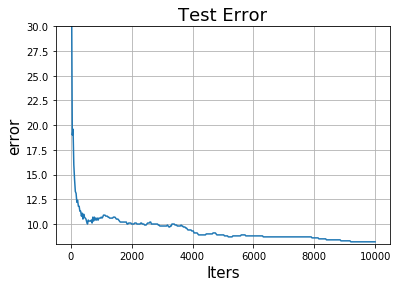

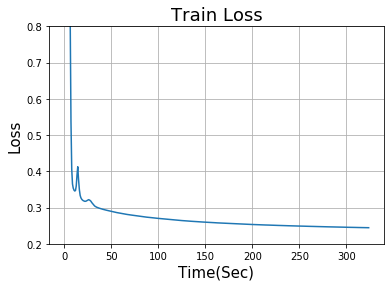

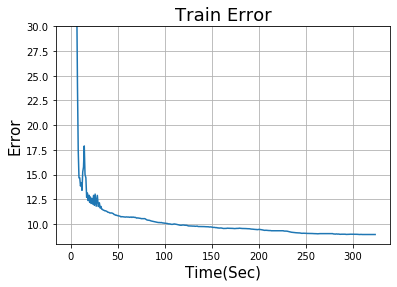

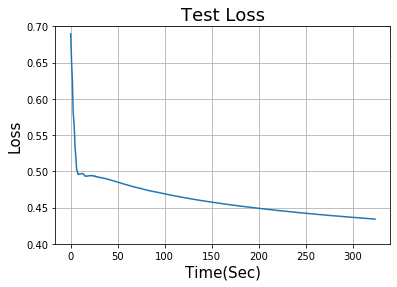

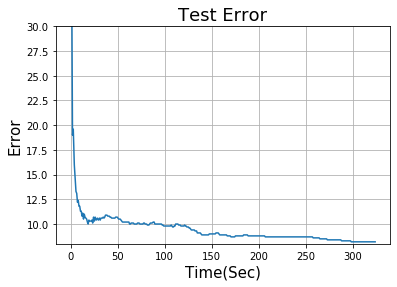

In [235]:
title = "GD"
df_GD = data_preprocess1('./results/GD_0.005_0.0001.txt')
plot(df_GD, title)

In [239]:
def plot(df, title, batch_size = None):
    try:
        iters = df["iter"]
    except:
        print(1)
        iters = df.index*(500//batch_size)

    time = df['time']
    trainloss, testloss = df['trainloss'], df['testloss']
    trainerror, testerror = (1-df['trainaccu'])*100, (1-df['testaccu'])*100

    N = 100000

    plt.figure()
    plt.plot(iters[:N], trainloss[:N])
    plt.grid()
    plt.title('Train Loss', fontdict={'fontsize':18,'fontweight':16})
    plt.xlabel('Iters',fontdict={'fontsize':15,'fontweight':14})
    plt.ylabel('Loss',fontdict={'fontsize':15,'fontweight':14})
    plt.ylim((0.2,0.8))
    plt.savefig("plots/{}_iter_trainloss.png".format(title))

    plt.figure()
    plt.plot(iters[:N], trainerror[:N])
    plt.grid()
    plt.title('Train Error', fontdict={'fontsize':18,'fontweight':16})
    plt.xlabel('Iters',fontdict={'fontsize':15,'fontweight':14})
    plt.ylabel('Error',fontdict={'fontsize':15,'fontweight':14})
    plt.ylim((8,30))
    plt.savefig("plots/{}_iter_trainerror.png".format(title))

    plt.figure()
    plt.plot(iters[:N], testloss[:N])
    plt.grid()
    plt.title('Test Loss', fontdict={'fontsize':18,'fontweight':16})
    plt.xlabel('Iters',fontdict={'fontsize':15,'fontweight':14})
    plt.ylabel('Loss',fontdict={'fontsize':15,'fontweight':14})
    plt.ylim((0.3,0.7))
    plt.savefig("plots/{}_iter_testloss.png".format(title))

    plt.figure()
    plt.plot(iters[:N], testerror[:N])
    plt.grid()
    plt.title('Test Error', fontdict={'fontsize':18,'fontweight':16})
    plt.xlabel('Iters',fontdict={'fontsize':15,'fontweight':14})
    plt.ylabel('error',fontdict={'fontsize':15,'fontweight':14})
    plt.ylim((5,30))
    plt.savefig("plots/{}_iter_testerror.png".format(title))

    ### time

    plt.figure()
    plt.plot(time[:N], trainloss[:N])
    plt.grid()
    plt.title('Train Loss', fontdict={'fontsize':18,'fontweight':16})
    plt.xlabel('Time(Sec)',fontdict={'fontsize':15,'fontweight':14})
    plt.ylabel('Loss',fontdict={'fontsize':15,'fontweight':14})
    plt.ylim((0.2,0.8))
    plt.savefig("plots/{}_time_trainloss.png".format(title))

    plt.figure()
    plt.plot(time[:N], trainerror[:N])
    plt.grid()
    plt.title('Train Error', fontdict={'fontsize':18,'fontweight':16})
    plt.xlabel('Time(Sec)',fontdict={'fontsize':15,'fontweight':14})
    plt.ylabel('Error',fontdict={'fontsize':15,'fontweight':14})
    plt.ylim((8,30))
    plt.savefig("plots/{}_time_trainerror.png".format(title))

    plt.figure()
    plt.plot(time[:N], testloss[:N])
    plt.grid()
    plt.title('Test Loss', fontdict={'fontsize':18,'fontweight':16})
    plt.xlabel('Time(Sec)',fontdict={'fontsize':15,'fontweight':14})
    plt.ylabel('Loss',fontdict={'fontsize':15,'fontweight':14})
    plt.ylim((0.3,0.7))
    plt.savefig("plots/{}_time_testloss.png".format(title))

    plt.figure()
    plt.plot(time[:N], testerror[:N])
    plt.grid()
    plt.title('Test Error', fontdict={'fontsize':18,'fontweight':16})
    plt.xlabel('Time(Sec)',fontdict={'fontsize':15,'fontweight':14})
    plt.ylabel('Error',fontdict={'fontsize':15,'fontweight':14})
    plt.ylim((5,30))
    plt.savefig("plots/{}_time_testerror.png".format(title))

1


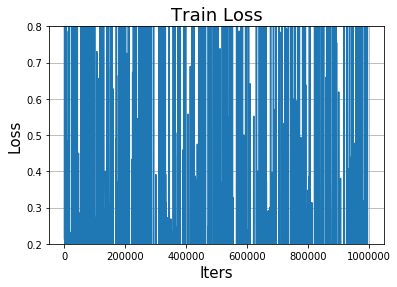

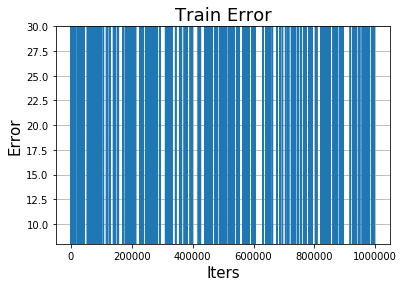

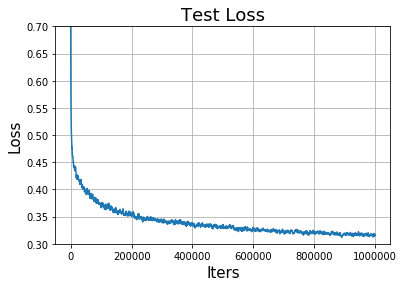

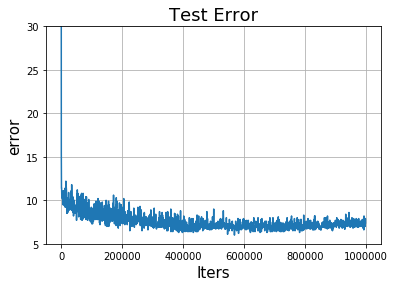

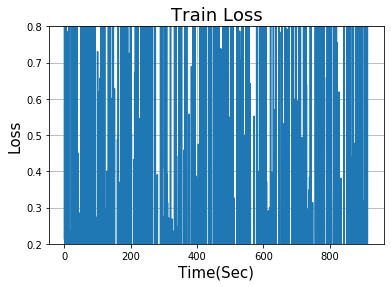

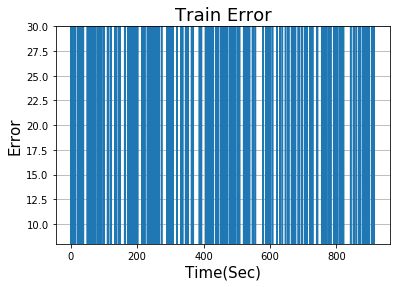

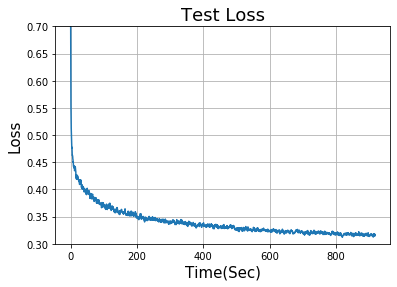

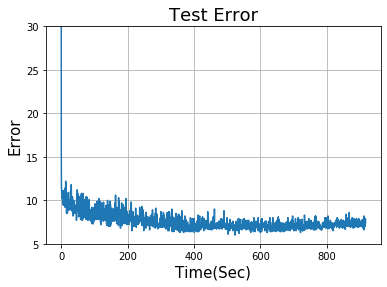

In [240]:
title = "SGD_1"
batch_size = 1
df_SGD_1 = data_preprocess2('./results/SGD_0.001_0.0001_1.txt')
plot(df_SGD_1, title,batch_size)

In [241]:
def plot(df, title, batch_size = None):
    try:
        iters = df["iter"]
    except:
        print(1)
        iters = df.index*(500//batch_size)

    time = df['time']
    trainloss, testloss = df['trainloss'], df['testloss']
    trainerror, testerror = (1-df['trainaccu'])*100, (1-df['testaccu'])*100

    N = 100000

    plt.figure()
    plt.plot(iters[:N], trainloss[:N])
    plt.grid()
    plt.title('Train Loss', fontdict={'fontsize':18,'fontweight':16})
    plt.xlabel('Iters',fontdict={'fontsize':15,'fontweight':14})
    plt.ylabel('Loss',fontdict={'fontsize':15,'fontweight':14})
    plt.ylim((0.1,0.8))
    plt.savefig("plots/{}_iter_trainloss.png".format(title))

    plt.figure()
    plt.plot(iters[:N], trainerror[:N])
    plt.grid()
    plt.title('Train Error', fontdict={'fontsize':18,'fontweight':16})
    plt.xlabel('Iters',fontdict={'fontsize':15,'fontweight':14})
    plt.ylabel('Error',fontdict={'fontsize':15,'fontweight':14})
    plt.ylim((0,30))
    plt.savefig("plots/{}_iter_trainerror.png".format(title))

    plt.figure()
    plt.plot(iters[:N], testloss[:N])
    plt.grid()
    plt.title('Test Loss', fontdict={'fontsize':18,'fontweight':16})
    plt.xlabel('Iters',fontdict={'fontsize':15,'fontweight':14})
    plt.ylabel('Loss',fontdict={'fontsize':15,'fontweight':14})
    plt.ylim((0.4,0.7))
    plt.savefig("plots/{}_iter_testloss.png".format(title))

    plt.figure()
    plt.plot(iters[:N], testerror[:N])
    plt.grid()
    plt.title('Test Error', fontdict={'fontsize':18,'fontweight':16})
    plt.xlabel('Iters',fontdict={'fontsize':15,'fontweight':14})
    plt.ylabel('error',fontdict={'fontsize':15,'fontweight':14})
    plt.ylim((5,30))
    plt.savefig("plots/{}_iter_testerror.png".format(title))

    ### time

    plt.figure()
    plt.plot(time[:N], trainloss[:N])
    plt.grid()
    plt.title('Train Loss', fontdict={'fontsize':18,'fontweight':16})
    plt.xlabel('Time(Sec)',fontdict={'fontsize':15,'fontweight':14})
    plt.ylabel('Loss',fontdict={'fontsize':15,'fontweight':14})
    plt.ylim((0.1,0.8))
    plt.savefig("plots/{}_time_trainloss.png".format(title))

    plt.figure()
    plt.plot(time[:N], trainerror[:N])
    plt.grid()
    plt.title('Train Error', fontdict={'fontsize':18,'fontweight':16})
    plt.xlabel('Time(Sec)',fontdict={'fontsize':15,'fontweight':14})
    plt.ylabel('Error',fontdict={'fontsize':15,'fontweight':14})
    plt.ylim((0,30))
    plt.savefig("plots/{}_time_trainerror.png".format(title))

    plt.figure()
    plt.plot(time[:N], testloss[:N])
    plt.grid()
    plt.title('Test Loss', fontdict={'fontsize':18,'fontweight':16})
    plt.xlabel('Time(Sec)',fontdict={'fontsize':15,'fontweight':14})
    plt.ylabel('Loss',fontdict={'fontsize':15,'fontweight':14})
    plt.ylim((0.4,0.7))
    plt.savefig("plots/{}_time_testloss.png".format(title))

    plt.figure()
    plt.plot(time[:N], testerror[:N])
    plt.grid()
    plt.title('Test Error', fontdict={'fontsize':18,'fontweight':16})
    plt.xlabel('Time(Sec)',fontdict={'fontsize':15,'fontweight':14})
    plt.ylabel('Error',fontdict={'fontsize':15,'fontweight':14})
    plt.ylim((5,30))
    plt.savefig("plots/{}_time_testerror.png".format(title))

1


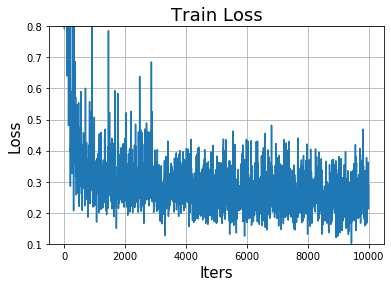

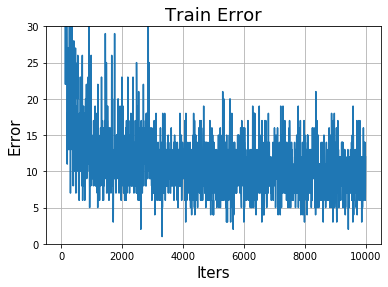

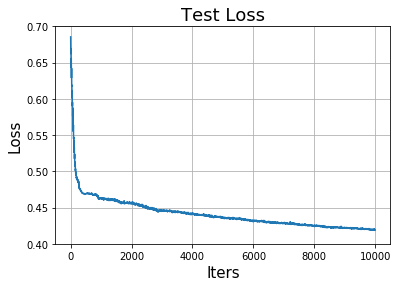

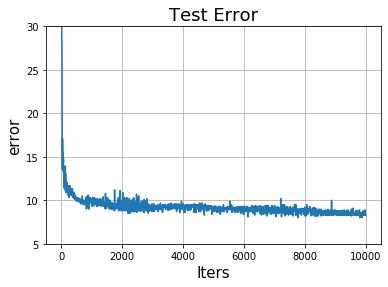

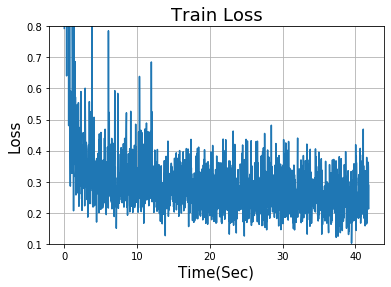

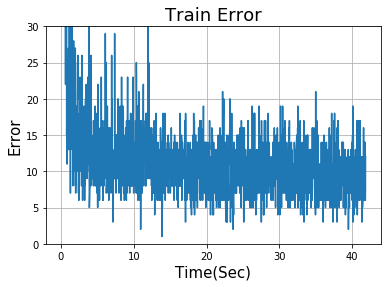

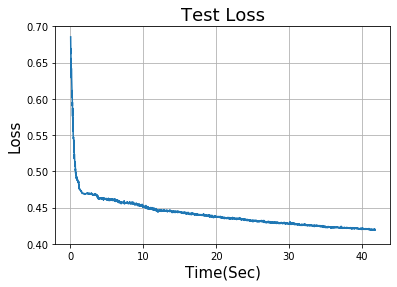

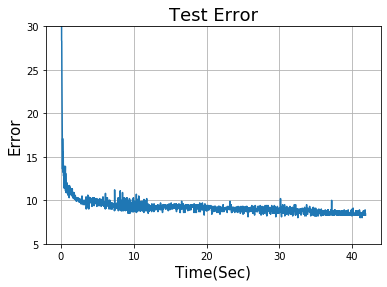

In [242]:
title = "SGD_100"
batch_size = 100
df_SGD_100 = data_preprocess2('./results/SGD_0.005_0.0001_100.txt')
plot(df_SGD_100, title,batch_size)

In [243]:
def plot(df, title, batch_size = None):
    try:
        iters = df["iter"]
    except:
        print(1)
        iters = df.index*(500//batch_size)

    time = df['time']
    trainloss, testloss = df['trainloss'], df['testloss']
    trainerror, testerror = (1-df['trainaccu'])*100, (1-df['testaccu'])*100

    N = 100000

    plt.figure()
    plt.plot(iters[:N], trainloss[:N])
    plt.grid()
    plt.title('Train Loss', fontdict={'fontsize':18,'fontweight':16})
    plt.xlabel('Iters',fontdict={'fontsize':15,'fontweight':14})
    plt.ylabel('Loss',fontdict={'fontsize':15,'fontweight':14})
    plt.ylim((0.2,0.7))
    plt.savefig("plots/{}_iter_trainloss.png".format(title))

    plt.figure()
    plt.plot(iters[:N], trainerror[:N])
    plt.grid()
    plt.title('Train Error', fontdict={'fontsize':18,'fontweight':16})
    plt.xlabel('Iters',fontdict={'fontsize':15,'fontweight':14})
    plt.ylabel('Error',fontdict={'fontsize':15,'fontweight':14})
    plt.ylim((5,30))
    plt.savefig("plots/{}_iter_trainerror.png".format(title))

    plt.figure()
    plt.plot(iters[:N], testloss[:N])
    plt.grid()
    plt.title('Test Loss', fontdict={'fontsize':18,'fontweight':16})
    plt.xlabel('Iters',fontdict={'fontsize':15,'fontweight':14})
    plt.ylabel('Loss',fontdict={'fontsize':15,'fontweight':14})
    plt.ylim((0.2,0.7))
    plt.savefig("plots/{}_iter_testloss.png".format(title))

    plt.figure()
    plt.plot(iters[:N], testerror[:N])
    plt.grid()
    plt.title('Test Error', fontdict={'fontsize':18,'fontweight':16})
    plt.xlabel('Iters',fontdict={'fontsize':15,'fontweight':14})
    plt.ylabel('error',fontdict={'fontsize':15,'fontweight':14})
    plt.ylim((5,30))
    plt.savefig("plots/{}_iter_testerror.png".format(title))

    ### time

    plt.figure()
    plt.plot(time[:N], trainloss[:N])
    plt.grid()
    plt.title('Train Loss', fontdict={'fontsize':18,'fontweight':16})
    plt.xlabel('Time(Sec)',fontdict={'fontsize':15,'fontweight':14})
    plt.ylabel('Loss',fontdict={'fontsize':15,'fontweight':14})
    plt.ylim((0.2,0.7))
    plt.savefig("plots/{}_time_trainloss.png".format(title))

    plt.figure()
    plt.plot(time[:N], trainerror[:N])
    plt.grid()
    plt.title('Train Error', fontdict={'fontsize':18,'fontweight':16})
    plt.xlabel('Time(Sec)',fontdict={'fontsize':15,'fontweight':14})
    plt.ylabel('Error',fontdict={'fontsize':15,'fontweight':14})
    plt.ylim((5,30))
    plt.savefig("plots/{}_time_trainerror.png".format(title))

    plt.figure()
    plt.plot(time[:N], testloss[:N])
    plt.grid()
    plt.title('Test Loss', fontdict={'fontsize':18,'fontweight':16})
    plt.xlabel('Time(Sec)',fontdict={'fontsize':15,'fontweight':14})
    plt.ylabel('Loss',fontdict={'fontsize':15,'fontweight':14})
    plt.ylim((0.2,0.7))
    plt.savefig("plots/{}_time_testloss.png".format(title))

    plt.figure()
    plt.plot(time[:N], testerror[:N])
    plt.grid()
    plt.title('Test Error', fontdict={'fontsize':18,'fontweight':16})
    plt.xlabel('Time(Sec)',fontdict={'fontsize':15,'fontweight':14})
    plt.ylabel('Error',fontdict={'fontsize':15,'fontweight':14})
    plt.ylim((5,30))
    plt.savefig("plots/{}_time_testerror.png".format(title))

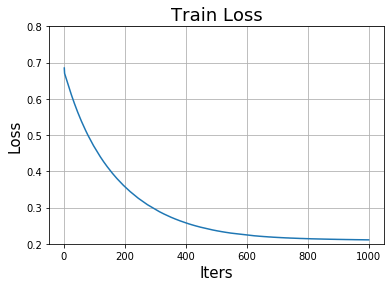

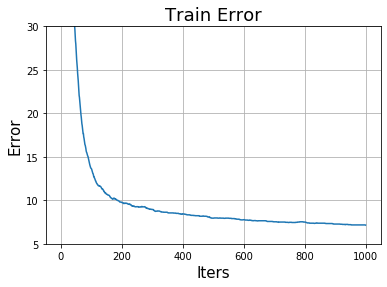

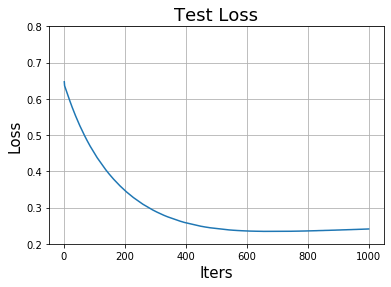

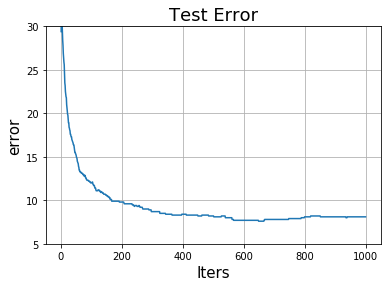

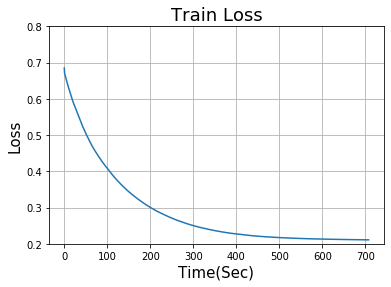

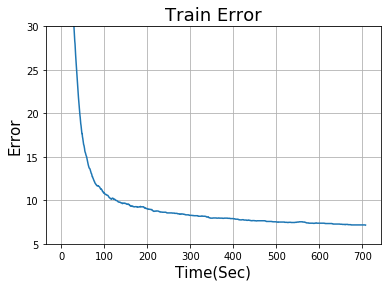

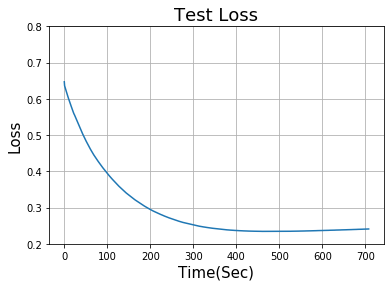

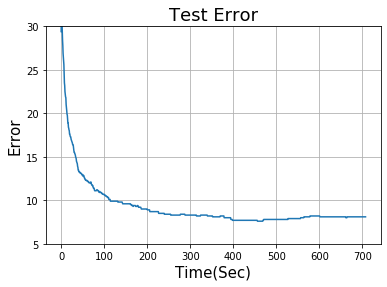

In [259]:
title = "BFGS"
df_BFGS = data_preprocess1('./results/BFGS_0.005_0.0001.txt')
plot(df_BFGS, title)

In [245]:
def plot(df, title, batch_size = None):
    try:
        iters = df["iter"]
    except:
        print(1)
        iters = df.index*(500//batch_size)

    time = df['time']
    trainloss, testloss = df['trainloss'], df['testloss']
    trainerror, testerror = (1-df['trainaccu'])*100, (1-df['testaccu'])*100

    N = 10000

    plt.figure()
    plt.plot(iters[:N], trainloss[:N])
    plt.grid()
    plt.title('Train Loss', fontdict={'fontsize':18,'fontweight':16})
    plt.xlabel('Iters',fontdict={'fontsize':15,'fontweight':14})
    plt.ylabel('Loss',fontdict={'fontsize':15,'fontweight':14})
    plt.ylim((0.2,0.8))
    plt.savefig("plots/{}_iter_trainloss.png".format(title))

    plt.figure()
    plt.plot(iters[:N], trainerror[:N])
    plt.grid()
    plt.title('Train Error', fontdict={'fontsize':18,'fontweight':16})
    plt.xlabel('Iters',fontdict={'fontsize':15,'fontweight':14})
    plt.ylabel('Error',fontdict={'fontsize':15,'fontweight':14})
    plt.ylim((5,30))
    plt.savefig("plots/{}_iter_trainerror.png".format(title))

    plt.figure()
    plt.plot(iters[:N], testloss[:N])
    plt.grid()
    plt.title('Test Loss', fontdict={'fontsize':18,'fontweight':16})
    plt.xlabel('Iters',fontdict={'fontsize':15,'fontweight':14})
    plt.ylabel('Loss',fontdict={'fontsize':15,'fontweight':14})
    plt.ylim((0.2,0.8))
    plt.savefig("plots/{}_iter_testloss.png".format(title))

    plt.figure()
    plt.plot(iters[:N], testerror[:N])
    plt.grid()
    plt.title('Test Error', fontdict={'fontsize':18,'fontweight':16})
    plt.xlabel('Iters',fontdict={'fontsize':15,'fontweight':14})
    plt.ylabel('error',fontdict={'fontsize':15,'fontweight':14})
    plt.ylim((5,30))
    plt.savefig("plots/{}_iter_testerror.png".format(title))

    ### time

    plt.figure()
    plt.plot(time[:N], trainloss[:N])
    plt.grid()
    plt.title('Train Loss', fontdict={'fontsize':18,'fontweight':16})
    plt.xlabel('Time(Sec)',fontdict={'fontsize':15,'fontweight':14})
    plt.ylabel('Loss',fontdict={'fontsize':15,'fontweight':14})
    plt.ylim((0.2,0.8))
    plt.savefig("plots/{}_time_trainloss.png".format(title))

    plt.figure()
    plt.plot(time[:N], trainerror[:N])
    plt.grid()
    plt.title('Train Error', fontdict={'fontsize':18,'fontweight':16})
    plt.xlabel('Time(Sec)',fontdict={'fontsize':15,'fontweight':14})
    plt.ylabel('Error',fontdict={'fontsize':15,'fontweight':14})
    plt.ylim((5,30))
    plt.savefig("plots/{}_time_trainerror.png".format(title))

    plt.figure()
    plt.plot(time[:N], testloss[:N])
    plt.grid()
    plt.title('Test Loss', fontdict={'fontsize':18,'fontweight':16})
    plt.xlabel('Time(Sec)',fontdict={'fontsize':15,'fontweight':14})
    plt.ylabel('Loss',fontdict={'fontsize':15,'fontweight':14})
    plt.ylim((0.2,0.8))
    plt.savefig("plots/{}_time_testloss.png".format(title))

    plt.figure()
    plt.plot(time[:N], testerror[:N])
    plt.grid()
    plt.title('Test Error', fontdict={'fontsize':18,'fontweight':16})
    plt.xlabel('Time(Sec)',fontdict={'fontsize':15,'fontweight':14})
    plt.ylabel('Error',fontdict={'fontsize':15,'fontweight':14})
    plt.ylim((5,30))
    plt.savefig("plots/{}_time_testerror.png".format(title))

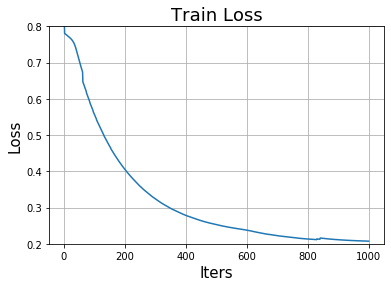

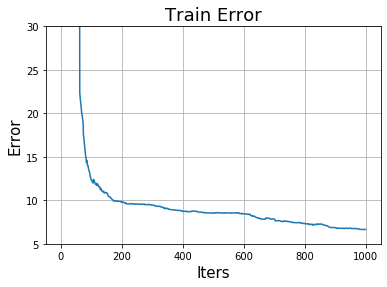

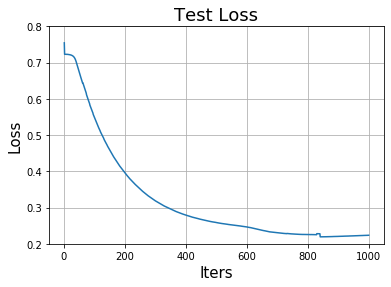

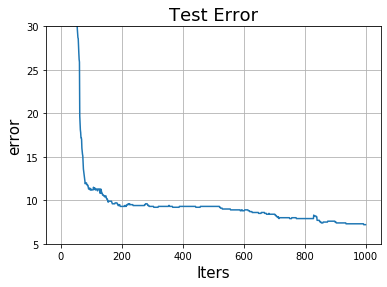

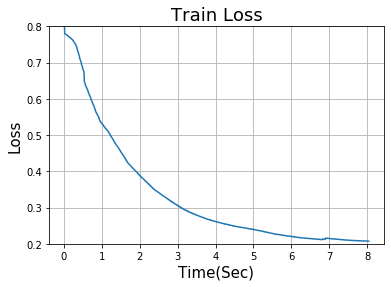

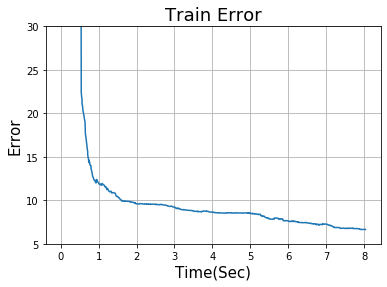

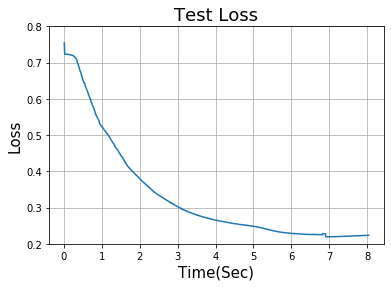

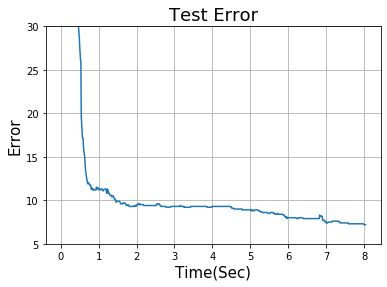

In [262]:
title = "LBFGS"
df_LBFGS = data_preprocess1('./results/LBFGS_0.005_0.0001.txt')
plot(df_LBFGS, title)

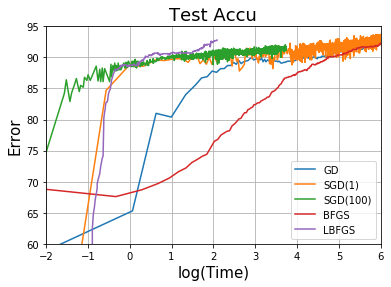

In [263]:
plt.figure()
plt.plot(np.log(df_GD['time']), df_GD['testaccu']*100,label="GD")
plt.plot(np.log(df_SGD_1['time']), df_SGD_1['testaccu']*100,label="SGD(1)")
plt.plot(np.log(df_SGD_100['time']), df_SGD_100['testaccu']*100,label="SGD(100)")
plt.plot(np.log(df_BFGS['time']), df_BFGS['testaccu']*100,label="BFGS")
plt.plot(np.log(df_LBFGS['time']), df_LBFGS['testaccu']*100,label="LBFGS")
plt.grid()
plt.title('Test Accu', fontdict={'fontsize':18,'fontweight':16})
plt.xlabel('log(Time)',fontdict={'fontsize':15,'fontweight':14})
plt.ylabel('Error',fontdict={'fontsize':15,'fontweight':14})
plt.legend()
plt.ylim((60,95))
plt.xlim((-2,6))
plt.savefig("plots/{}_time_testerror.png".format('compare'))